# **New Plant Diseases Dataset** - *Samir Bhattarai* **(Kaggle)**

In [ ]:
import kagglehub

path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [01:09<00:00, 41.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


# **Importing Required modules**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2

# **Loading Train Data**

In [31]:
train_data = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

# **Feed data into deep learning model**

In [32]:
train_size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train_data,
    target_size=(train_size, train_size),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle = True
)

Found 63282 images belonging to 38 classes.


# **Mapping images into numerical format**

In [33]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

# **Inspecting Images (Labelled correctly)**

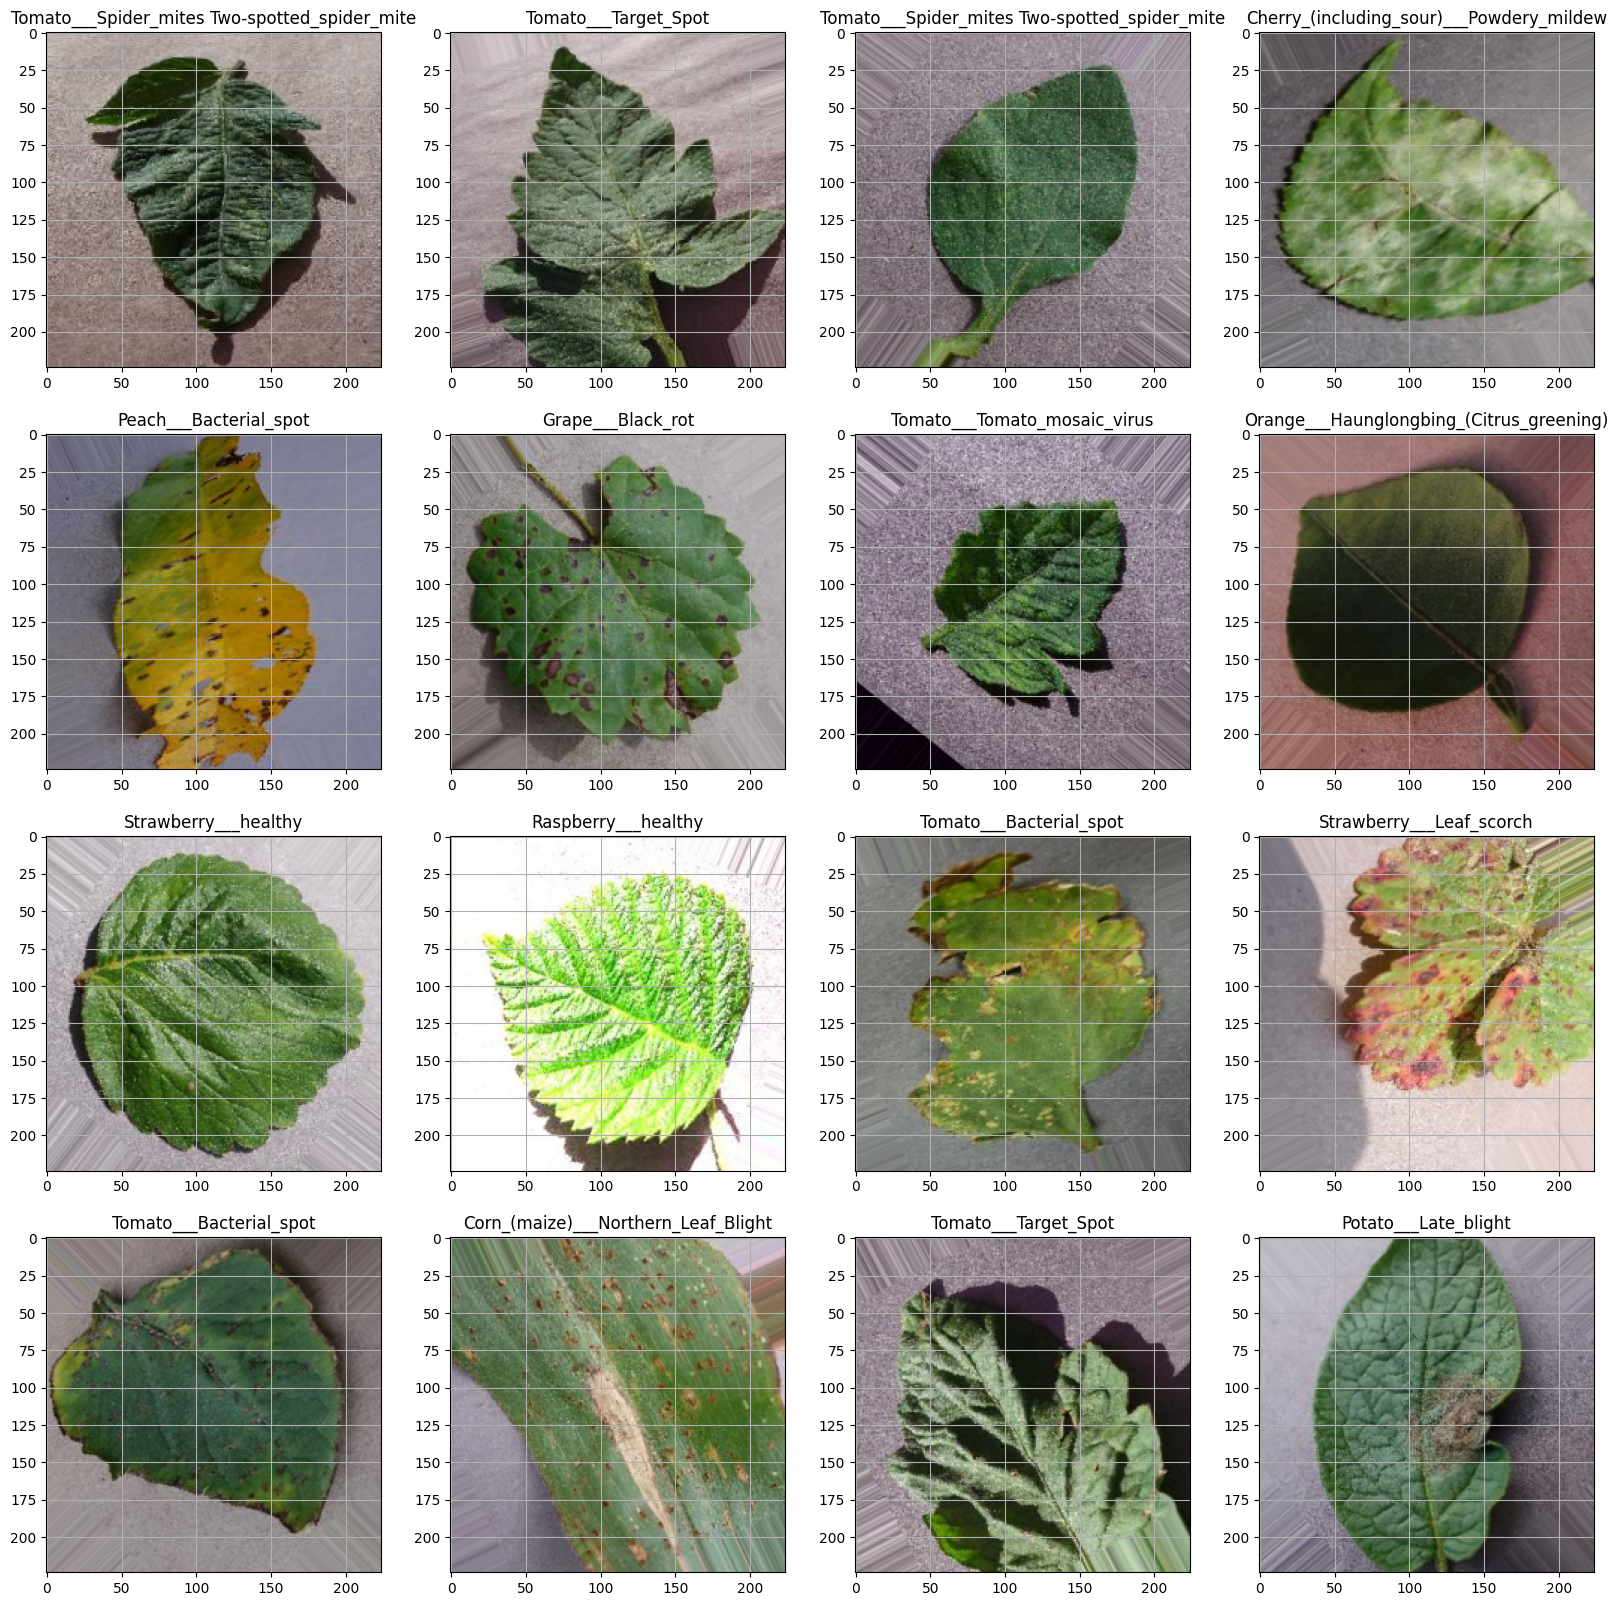

In [34]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for x_batch, y_batch in train_generator:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(x_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
        plt.grid(None)
    plt.show()
    break

# **Loading Validate Data**

In [35]:
valid_data = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# **Evaluate model performance on unsceen data during training**

In [36]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split = 0.1
).flow_from_directory(valid_data,
                      batch_size=164,
                      target_size = (train_size, train_size),
                      class_mode='categorical',
                      color_mode='rgb',
                      subset='validation',
                      shuffle = False
                      )

Found 1742 images belonging to 38 classes.


# **Loading Test Data**

In [37]:
test_data = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# **Evaluate trained model performance**

In [38]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test_data,
                      batch_size=64,
                      target_size = (224, 224),
                      class_mode='categorical',
                      color_mode='rgb',
                      shuffle = False
                      )

Found 17572 images belonging to 38 classes.


# **Retrieve the mapping between class names and numerical indices**

In [39]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

# **WEEK - 2**

# **Importing Tensorflow**

In [40]:
from tensorflow import keras

# **linear stacking of layers for building neural networks**

In [41]:
model = keras.models.Sequential()

# **Convolution and Maxpooling layer - 1**

In [42]:
model.add(keras.layers.Conv2D(filters = 32,kernel_size=7, strides=1,padding='same', activation='relu',name = 'Conv1', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2,name="Pool1"))

# **Convolution and Maxpooling layer - 2**

In [43]:
model.add(keras.layers.Conv2D(filters = 64,kernel_size=5, strides=1,padding='same', activation='relu',name = 'Conv2'))
model.add(keras.layers.MaxPool2D(pool_size=2,name="Pool2"))

# **Convolution and Maxpooling layer - 3**

In [44]:
model.add(keras.layers.Conv2D(filters = 128,kernel_size=3, strides=1,padding='same', activation='relu',name = 'Conv3'))
model.add(keras.layers.MaxPool2D(pool_size=2,name="Pool3"))

# **Convolution layer - 4**

In [45]:
model.add(keras.layers.Conv2D(filters = 256,kernel_size=3, strides=1,padding='same', activation='relu',name = 'Conv4'))

# **Flatten layer**

In [46]:
model.add(keras.layers.Flatten(name="Flatten1"))

# **Dense Layer - 1**

In [47]:
model.add(keras.layers.Dense(128, activation = 'relu',name ='Dense1'))
tf.keras.layers.Dropout(0.5)

<Dropout name=dropout_2, built=True>

# **Dense Layer - 2**

In [48]:

model.add(keras.layers.Dense(64, activation = 'relu',name ='Dense2'))
tf.keras.layers.Dropout(0.5)

<Dropout name=dropout_3, built=True>

# **Output Layer**

In [49]:
model.add(keras.layers.Dense(38, activation = 'softmax',name ='Output'))

# **Summary**

In [50]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


# **Importing callbacks**

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# **Avoiding overlaps**

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 15,restore_best_weights=True)

# **Saving Checkpoints**

In [53]:
model_checkpoint = ModelCheckpoint('best_model.keras',monitor = 'val_loss',save_best_only=True)

# **Learning Rates**

In [54]:
model_ReduceLRonPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr = 0.00001)

# **Defining callbacks**

In [55]:
callbacks = [early_stopping,model_checkpoint,model_ReduceLRonPlateau]

# **Compiling model**

In [56]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','precision','recall'])

# **Fitting model**

In [57]:
history = model.fit(train_generator,epochs=5,validation_data=valid_generator,callbacks=callbacks)

Epoch 1/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 865s 869ms/step - accuracy: 0.2381 - loss: 2.7343 - precision: 0.6908 - recall: 0.1070 - val_accuracy: 0.5752 - val_loss: 1.4364 - val_precision: 0.7310 - val_recall: 0.4805 - learning_rate: 0.0010
Epoch 2/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 784s 793ms/step - accuracy: 0.7123 - loss: 0.9192 - precision: 0.8211 - recall: 0.6148 - val_accuracy: 0.7704 - val_loss: 0.7372 - val_precision: 0.8310 - val_recall: 0.7170 - learning_rate: 0.0010
Epoch 3/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 771s 780ms/step - accuracy: 0.8342 - loss: 0.5107 - precision: 0.8780 - recall: 0.7959 - val_accuracy: 0.8639 - val_loss: 0.4407 - val_precision: 0.9017 - val_recall: 0.8318 - learning_rate: 0.0010
Epoch 4/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 789s 797ms/step - accuracy: 0.8711 - loss: 0.3857 - precision: 0.9004 - recall: 0.8460 - val_accuracy: 0.8789 - val_loss: 0.3617 - val_precision: 0.9073 - val_recall: 0.8651 - learning_rate: 0.0010
Epoch 5/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 789s 784ms/st

# **Importing for data visualization**

In [58]:
import seaborn as sns

# **Extracting training accuracy**

In [59]:
acc = history.history['accuracy']

# **Extracting validation accuracy**

In [60]:
val_acc = history.history['val_accuracy']

# **Extracting training precision**

In [61]:
precision = history.history['precision']

# **Extracting validation precision**

In [62]:
val_Precision = history.history['val_precision']

# **Extracting training recall**

In [63]:
recall = history.history['recall']

# **Extracting validation recall**

In [64]:
val_recall = history.history['val_recall']

# **Sequence of Epochs**

In [65]:
epochs = range(1,len(acc) + 1)

# **Training accuracy values against epochs**

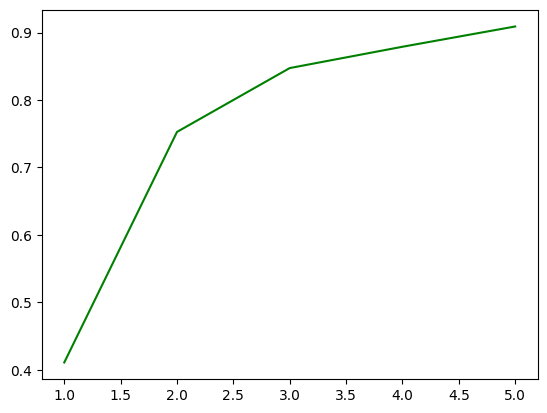

In [66]:
plt.plot(epochs,acc,color = 'green',label="Train Acc")

#**Validation accuracy values against epochs**

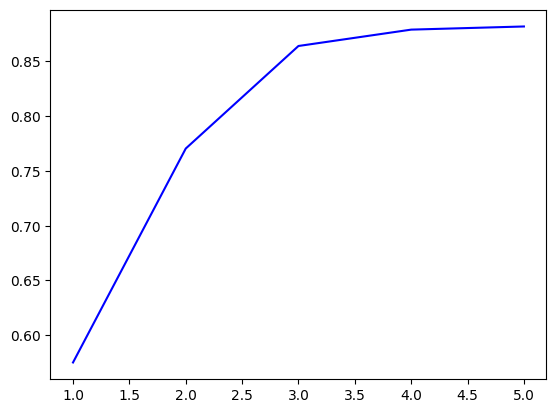

In [67]:
plt.plot(epochs,val_acc,color = 'blue',label="Val Acc")

# **Plotting the graph**

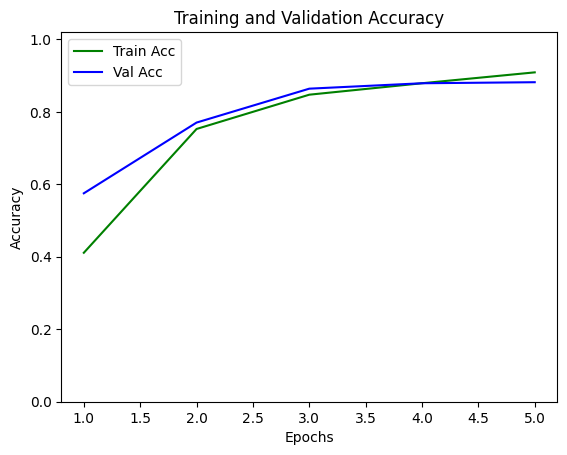

In [71]:
plt.plot(epochs,acc,color = 'green',label="Train Acc")
plt.plot(epochs,val_acc,color = 'blue',label="Val Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.ylim(0,1.02)
plt.show()

# **Evaluate the model on the test data**

In [72]:
model_evaluate = model.evaluate(test_generator)

275/275 ━━━━━━━━━━━━━━━━━━━━ 36s 131ms/step - accuracy: 0.8952 - loss: 0.3129 - precision: 0.9130 - recall: 0.8803


# **Loss,Accuracy,Precicion and Recall value printing**

In [74]:
print("loss :",model_evaluate[0])
print("Accuracy :",model_evaluate[1])
print("Precision :",model_evaluate[2])
print("Recall :",model_evaluate[3])

loss : 0.33026939630508423
Accuracy : 0.8896539807319641
Precision : 0.9114270210266113
Recall : 0.871955394744873


# **Saving the cnn model**

In [75]:
model.save('CNN_Model.keras')